# YOLOv11-Small Model Image Classification
Based on Edje Electronics' YOLO Tutorial:
###### https://github.com/EdjeElectronics/Train-and-Deploy-YOLO-Models

### Download the COCO dataset
Use the functions defined in `../data/load_coco_dataset.py` to download data for the desired objects for detection to train the model on and process it into the required format for further processing.

In [1]:
import os
import sys
import subprocess
sys.path.append(os.path.abspath(os.path.join('..')))

# Load the dataset and launch the FiftyOne app to visualize it
import data.load_coco_dataset as lcd
classes = ['bottle']
lcd.launch_fiftyone_app(lcd.load_and_parse_coco_dataset(classes=classes))

/home/jacob/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found annotations at '/home/jacob/fiftyone/coco-2017/raw/instances_train2017.json'
Sufficient images already downloaded
Existing download of split 'train' is sufficient
Loading existing dataset 'coco-2017-train-500'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Directory '../data/coco_data' already exists; export will be merged with existing files
 100% |█████████████████| 500/500 [305.9ms elapsed, 0s remaining, 1.6K samples/s]      
Computing embeddings...
 100% |█████████████████| 500/500 [516.4ms elapsed, 0s remaining, 1.0K samples/s]    
Computing uniqueness...
Uniqueness computation complete
Loaded 500 samples from the COCO-2017 dataset         with the following classes: ['bottle']:
Dataset:     coco-2017-train-500
Media type:  image
Num samples: 500
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(

FiftyOne running at: http://localhost:5151/


### Split the dataset
Use the functions defined in `../data/data_splitter.py` to randomly split the given dataset into 80% for training and 20% for validation.

In [2]:
import data.data_splitter as ds
dataset_type = 'YOLO_coin_data_12DEC30'
data_dir = f'../data/{dataset_type}'
ds.split_data(data_dir)

Number of image files: 750
Number of annotation files: 750
Images moving to train: 600
Images moving to test: 150


### Configure Model Training and Validation
Use the function defined in `../data/data_yaml_generator.py` to create the YAML data file for training and the `yolo detect {train/predict}` function given by Ultralytics for training and validating the YOLOv11 model on the dataset.

In [ ]:
# Create a YAML configuration file for YOLO
import data.data_yaml_generator as dyg
yaml_file = '../data/data.yaml'
classes_file = f'{data_dir}-split/classes.txt'
dyg.create_data_yaml(classes_file, yaml_file)

# Train the model using the YAML configuration file and YOLO model
TRAIN_MODEL = False
if TRAIN_MODEL:
    subprocess.run([
        "yolo", "detect", "train",
        f"data={yaml_file}",
        "model=yolo11s.pt",
        "epochs=60",
        "imgsz=640"
    ])

Created config file at ../data/data.yaml
New https://pypi.org/project/ultralytics/8.3.127 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.126 🚀 Python-3.12.9 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24077MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../data/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs

train: Scanning /home/motionprediction/.vscode/extensions/COE379L-robotic-arm-nlp/data/YOLO_coin_data_12DEC30-split/train/labels... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<00:00, 5730.30it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5724.8±2977.4 MB/s, size: 293.2 KB)
val: New cache created: /home/motionprediction/.vscode/extensions/COE379L-robotic-arm-nlp/data/YOLO_coin_data_12DEC30-split/test/labels.cache


val: Scanning /home/motionprediction/.vscode/extensions/COE379L-robotic-arm-nlp/data/YOLO_coin_data_12DEC30-split/test/labels... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<00:00, 3802.56it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      3.97G     0.6292      1.928      0.878         52        640: 100%|██████████| 38/38 [00:02<00:00, 15.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.86it/s]
       2/60       4.2G     0.5707      1.184     0.8534        116        640:   0%|          | 0/38 [00:00<?, ?it/s]

                   all        150        585      0.683      0.746      0.779      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60       4.2G     0.5605     0.9724     0.8476         57        640: 100%|██████████| 38/38 [00:02<00:00, 18.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.68it/s]


                   all        150        585      0.668      0.802      0.795      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60       4.2G     0.5496     0.7977     0.8409         42        640: 100%|██████████| 38/38 [00:01<00:00, 19.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.10it/s]


                   all        150        585      0.656      0.629      0.649      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60       4.2G     0.5778     0.7678      0.848         57        640: 100%|██████████| 38/38 [00:01<00:00, 19.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.34it/s]


                   all        150        585      0.557      0.608      0.516      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60       4.2G     0.5567     0.7048     0.8464         66        640: 100%|██████████| 38/38 [00:01<00:00, 19.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.83it/s]


                   all        150        585      0.793      0.822      0.909      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60       4.2G     0.5327     0.6434     0.8369         71        640: 100%|██████████| 38/38 [00:01<00:00, 19.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.92it/s]


                   all        150        585      0.808      0.888      0.938      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60       4.2G     0.5325      0.592     0.8365         66        640: 100%|██████████| 38/38 [00:01<00:00, 19.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.13it/s]


                   all        150        585      0.813      0.834      0.919      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60       4.2G     0.5307     0.5863      0.841         37        640: 100%|██████████| 38/38 [00:01<00:00, 19.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.23it/s]


                   all        150        585      0.881      0.884      0.941       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60       4.2G     0.5043     0.5472     0.8318         49        640: 100%|██████████| 38/38 [00:01<00:00, 19.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.17it/s]


                   all        150        585      0.807      0.879      0.935      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60       4.2G     0.5092     0.5501     0.8359         49        640: 100%|██████████| 38/38 [00:01<00:00, 19.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.36it/s]


                   all        150        585      0.859      0.863      0.959      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60       4.2G     0.4943     0.5297     0.8252         77        640: 100%|██████████| 38/38 [00:01<00:00, 19.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.67it/s]


                   all        150        585      0.789      0.879      0.956       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60       4.2G     0.5012     0.5303     0.8274         41        640: 100%|██████████| 38/38 [00:01<00:00, 19.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.72it/s]


                   all        150        585      0.917      0.932      0.974      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60       4.2G     0.4813     0.5001     0.8318         60        640: 100%|██████████| 38/38 [00:01<00:00, 19.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.13it/s]


                   all        150        585      0.926      0.914       0.98      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60       4.2G     0.4932     0.4784     0.8319         49        640: 100%|██████████| 38/38 [00:01<00:00, 19.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.30it/s]


                   all        150        585      0.819      0.878      0.952      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60       4.2G     0.4611     0.4794     0.8283         52        640: 100%|██████████| 38/38 [00:01<00:00, 19.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.85it/s]


                   all        150        585      0.827      0.877      0.941      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60       4.2G      0.483      0.481     0.8292         55        640: 100%|██████████| 38/38 [00:01<00:00, 19.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.36it/s]


                   all        150        585      0.913      0.949      0.983      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60       4.2G     0.4899     0.4572      0.827         61        640: 100%|██████████| 38/38 [00:01<00:00, 19.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.41it/s]


                   all        150        585       0.89      0.936      0.979      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60       4.2G     0.4791     0.4498     0.8285         48        640: 100%|██████████| 38/38 [00:01<00:00, 19.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.27it/s]


                   all        150        585      0.862      0.883      0.953      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60       4.2G     0.4697     0.4185     0.8236         47        640: 100%|██████████| 38/38 [00:01<00:00, 19.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.30it/s]


                   all        150        585      0.933      0.919      0.984      0.883

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60       4.2G     0.4701      0.427     0.8229         69        640: 100%|██████████| 38/38 [00:01<00:00, 19.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.75it/s]


                   all        150        585      0.964      0.964       0.99      0.891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60       4.2G     0.4718     0.4111     0.8252         45        640: 100%|██████████| 38/38 [00:01<00:00, 19.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.24it/s]


                   all        150        585      0.947      0.953      0.986      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60       4.2G      0.471     0.4203     0.8237         57        640: 100%|██████████| 38/38 [00:01<00:00, 19.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.23it/s]


                   all        150        585      0.942       0.95      0.986       0.89

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60       4.2G     0.4687     0.4089     0.8262         63        640: 100%|██████████| 38/38 [00:01<00:00, 19.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.41it/s]


                   all        150        585      0.834      0.844      0.947      0.857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60       4.2G     0.4526     0.3757     0.8202         75        640: 100%|██████████| 38/38 [00:01<00:00, 19.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.50it/s]


                   all        150        585      0.953      0.963      0.987      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60       4.2G     0.4519     0.3794     0.8228         73        640: 100%|██████████| 38/38 [00:01<00:00, 19.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.45it/s]


                   all        150        585      0.947      0.967      0.988      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60       4.2G     0.4554      0.366     0.8247         68        640: 100%|██████████| 38/38 [00:01<00:00, 19.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.14it/s]


                   all        150        585       0.93      0.968       0.99       0.89

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60       4.2G     0.4571     0.3585      0.822         69        640: 100%|██████████| 38/38 [00:01<00:00, 19.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.54it/s]


                   all        150        585      0.953      0.949      0.985      0.899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60       4.2G     0.4492     0.3462     0.8206         54        640: 100%|██████████| 38/38 [00:01<00:00, 19.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.49it/s]


                   all        150        585      0.867      0.909      0.976      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60       4.2G     0.4457     0.3489     0.8208         58        640: 100%|██████████| 38/38 [00:01<00:00, 19.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.25it/s]


                   all        150        585      0.883      0.916       0.98      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60       4.2G     0.4435     0.3586     0.8222         56        640: 100%|██████████| 38/38 [00:01<00:00, 19.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.54it/s]


                   all        150        585      0.941      0.965      0.992      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60       4.2G      0.434     0.3441     0.8143         74        640: 100%|██████████| 38/38 [00:01<00:00, 19.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.57it/s]


                   all        150        585      0.954      0.936      0.988      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60       4.2G     0.4284     0.3357     0.8164         51        640: 100%|██████████| 38/38 [00:01<00:00, 19.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.58it/s]


                   all        150        585      0.883      0.912       0.98      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60       4.2G     0.4397     0.3366     0.8198         40        640: 100%|██████████| 38/38 [00:01<00:00, 19.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.48it/s]


                   all        150        585      0.975      0.983      0.992      0.909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60       4.2G     0.4349     0.3336     0.8158         55        640: 100%|██████████| 38/38 [00:01<00:00, 19.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.36it/s]


                   all        150        585       0.96      0.936       0.99      0.899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60       4.2G     0.4339     0.3265     0.8217         52        640: 100%|██████████| 38/38 [00:01<00:00, 19.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.58it/s]


                   all        150        585      0.974      0.978      0.993      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60       4.2G     0.4319     0.3222     0.8178         39        640: 100%|██████████| 38/38 [00:01<00:00, 19.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.42it/s]


                   all        150        585      0.945      0.966      0.992      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60       4.2G     0.4269     0.3098      0.814         51        640: 100%|██████████| 38/38 [00:01<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.38it/s]


                   all        150        585      0.967      0.946      0.987        0.9

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60       4.2G     0.4267     0.3294     0.8165         43        640: 100%|██████████| 38/38 [00:01<00:00, 19.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.43it/s]


                   all        150        585      0.969      0.944      0.992      0.909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60       4.2G     0.4239     0.3114     0.8192         63        640: 100%|██████████| 38/38 [00:01<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.33it/s]


                   all        150        585       0.97      0.978      0.993      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60       4.2G     0.4274     0.3152     0.8207         64        640: 100%|██████████| 38/38 [00:01<00:00, 19.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.60it/s]


                   all        150        585      0.979      0.958      0.992      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60       4.2G     0.4199      0.308     0.8162         53        640: 100%|██████████| 38/38 [00:01<00:00, 19.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.15it/s]


                   all        150        585      0.946      0.925      0.981      0.899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60       4.2G     0.4161      0.296     0.8136         59        640: 100%|██████████| 38/38 [00:01<00:00, 19.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.50it/s]


                   all        150        585      0.944      0.939      0.987      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60       4.2G     0.4224      0.297     0.8168         50        640: 100%|██████████| 38/38 [00:01<00:00, 19.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.52it/s]


                   all        150        585      0.969      0.962      0.991       0.91

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60       4.2G     0.4098     0.2854     0.8175         67        640: 100%|██████████| 38/38 [00:01<00:00, 19.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.57it/s]


                   all        150        585       0.98      0.967      0.992      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60       4.2G     0.4062     0.2729     0.8147         42        640: 100%|██████████| 38/38 [00:01<00:00, 19.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.44it/s]


                   all        150        585       0.95      0.972       0.99      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60       4.2G     0.4057     0.2876     0.8159         50        640: 100%|██████████| 38/38 [00:01<00:00, 19.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.31it/s]


                   all        150        585      0.962      0.979      0.993      0.909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60       4.2G     0.4064     0.2867     0.8156         64        640: 100%|██████████| 38/38 [00:01<00:00, 19.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.27it/s]


                   all        150        585      0.971      0.987      0.993      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60       4.2G     0.4142      0.282     0.8124         73        640: 100%|██████████| 38/38 [00:01<00:00, 19.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.36it/s]


                   all        150        585      0.948      0.947      0.992      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60       4.2G     0.3989     0.2665     0.8099         49        640: 100%|██████████| 38/38 [00:01<00:00, 19.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.79it/s]


                   all        150        585      0.948       0.95      0.989       0.91

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60       4.2G     0.3982      0.257     0.8113         63        640: 100%|██████████| 38/38 [00:01<00:00, 19.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.52it/s]


                   all        150        585       0.98      0.977      0.993      0.915
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60       4.2G     0.3856     0.2277     0.7978         31        640: 100%|██████████| 38/38 [00:02<00:00, 17.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.09it/s]
      52/60       4.2G     0.3956     0.2479     0.7741         64        640:   0%|          | 0/38 [00:00<?, ?it/s]

                   all        150        585      0.934      0.945      0.989      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60       4.2G     0.3937      0.223     0.7969         27        640: 100%|██████████| 38/38 [00:01<00:00, 19.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 21.91it/s]


                   all        150        585      0.925       0.92      0.977      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60       4.2G     0.3842     0.2126     0.7971         31        640: 100%|██████████| 38/38 [00:01<00:00, 19.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.13it/s]


                   all        150        585       0.96      0.935      0.989      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60       4.2G     0.3815     0.2059     0.7923         29        640: 100%|██████████| 38/38 [00:01<00:00, 19.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.14it/s]


                   all        150        585      0.978       0.97      0.992      0.915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60       4.2G     0.3727     0.2014     0.7923         31        640: 100%|██████████| 38/38 [00:01<00:00, 19.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.15it/s]


                   all        150        585      0.955      0.954      0.991      0.909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60       4.2G     0.3749     0.2022     0.7922         27        640: 100%|██████████| 38/38 [00:01<00:00, 19.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.58it/s]


                   all        150        585      0.959      0.975      0.993      0.919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60       4.2G     0.3775     0.1969     0.7977         32        640: 100%|██████████| 38/38 [00:01<00:00, 19.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.41it/s]


                   all        150        585      0.948      0.944       0.99      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60       4.2G     0.3685     0.1934     0.7948         32        640: 100%|██████████| 38/38 [00:01<00:00, 19.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.40it/s]


                   all        150        585      0.958      0.976      0.991      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60       4.2G     0.3671     0.1865     0.7938         26        640: 100%|██████████| 38/38 [00:01<00:00, 19.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 23.56it/s]


                   all        150        585      0.963      0.944      0.987      0.909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60       4.2G      0.366     0.1853     0.7917         26        640: 100%|██████████| 38/38 [00:01<00:00, 19.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 22.84it/s]


                   all        150        585      0.962      0.965      0.988       0.91

60 epochs completed in 0.039 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 19.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.126 🚀 Python-3.12.9 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24077MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 13.62it/s]


                   all        150        585      0.959      0.974      0.993       0.92
                 penny        107        156      0.991      0.987      0.995      0.912
                nickel        105        152      0.967      0.978      0.989      0.901
                  dime         93        127          1      0.931      0.994      0.928
               quarter        108        150      0.879          1      0.995      0.937
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train3
💡 Learn more at https://docs.ultralytics.com/modes/train


In [4]:
# Evaluate the model
model_path = 'runs/detect/train3/weights/best.pt'
subprocess.run([
    "yolo", "detect", "predict",
    f"model={model_path}",
    f"source={data_dir}-split/test/images",
    "save=True"
])

Ultralytics 8.3.126 🚀 Python-3.12.9 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24077MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs

image 1/150 /home/motionprediction/.vscode/extensions/COE379L-robotic-arm-nlp/training/../data/YOLO_coin_data_12DEC30-split/test/images/IMG_3398.JPG: 640x480 2 pennys, 1 dime, 2 quarters, 25.9ms
image 2/150 /home/motionprediction/.vscode/extensions/COE379L-robotic-arm-nlp/training/../data/YOLO_coin_data_12DEC30-split/test/images/IMG_3415.JPG: 640x480 1 dime, 3 quarters, 2.2ms
image 3/150 /home/motionprediction/.vscode/extensions/COE379L-robotic-arm-nlp/training/../data/YOLO_coin_data_12DEC30-split/test/images/IMG_3419.JPG: 640x480 1 nickel, 1 quarter, 2.0ms
image 4/150 /home/motionprediction/.vscode/extensions/COE379L-robotic-arm-nlp/training/../data/YOLO_coin_data_12DEC30-split/test/images/IMG_3443.JPG: 640x480 1 nickel, 1 quarter, 2.0ms
image 5/150 /home/motionprediction/.vscode/extensions/COE379L-robotic-arm-n

CompletedProcess(args=['yolo', 'detect', 'predict', 'model=runs/detect/train3/weights/best.pt', 'source=../data/YOLO_coin_data_12DEC30-split/test/images', 'save=True'], returncode=0)

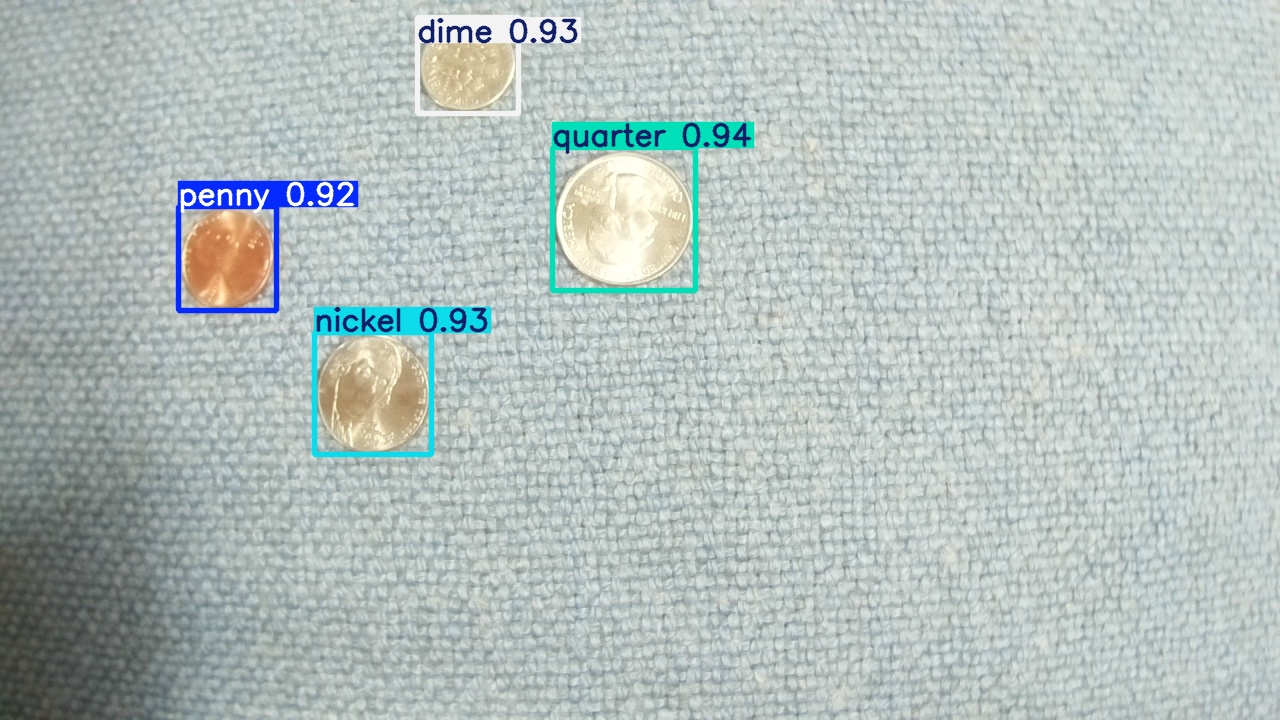

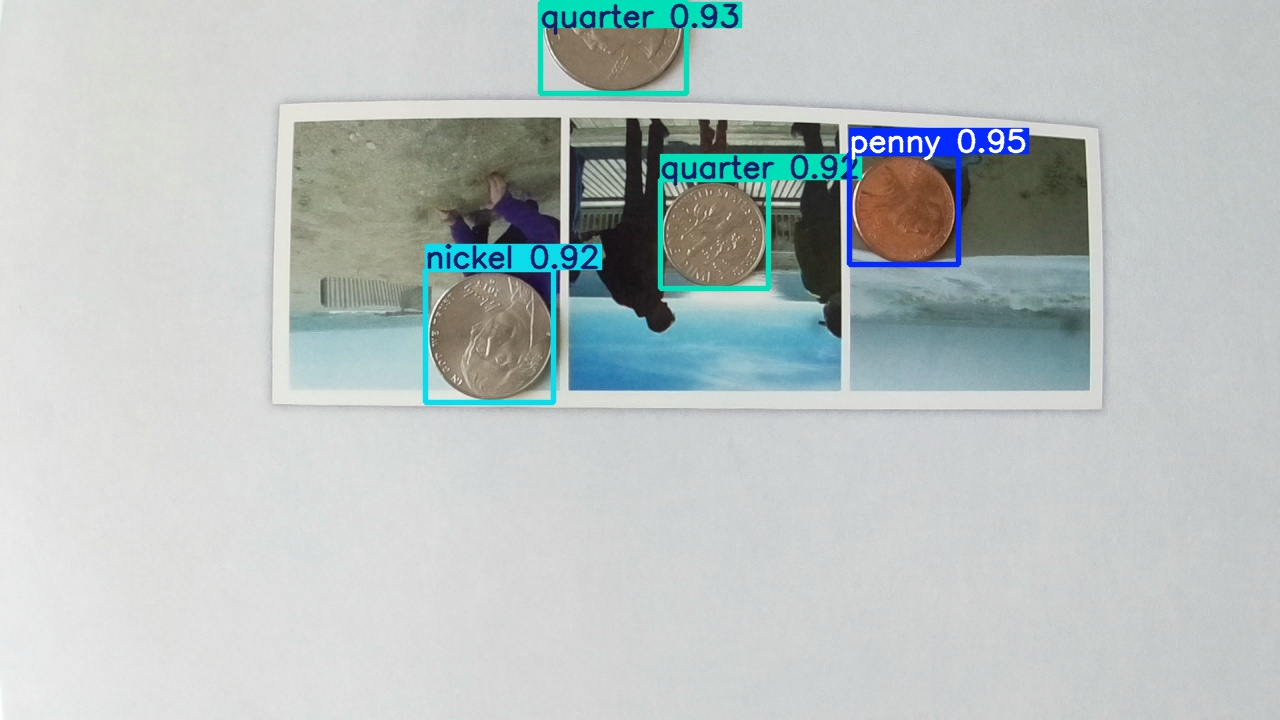

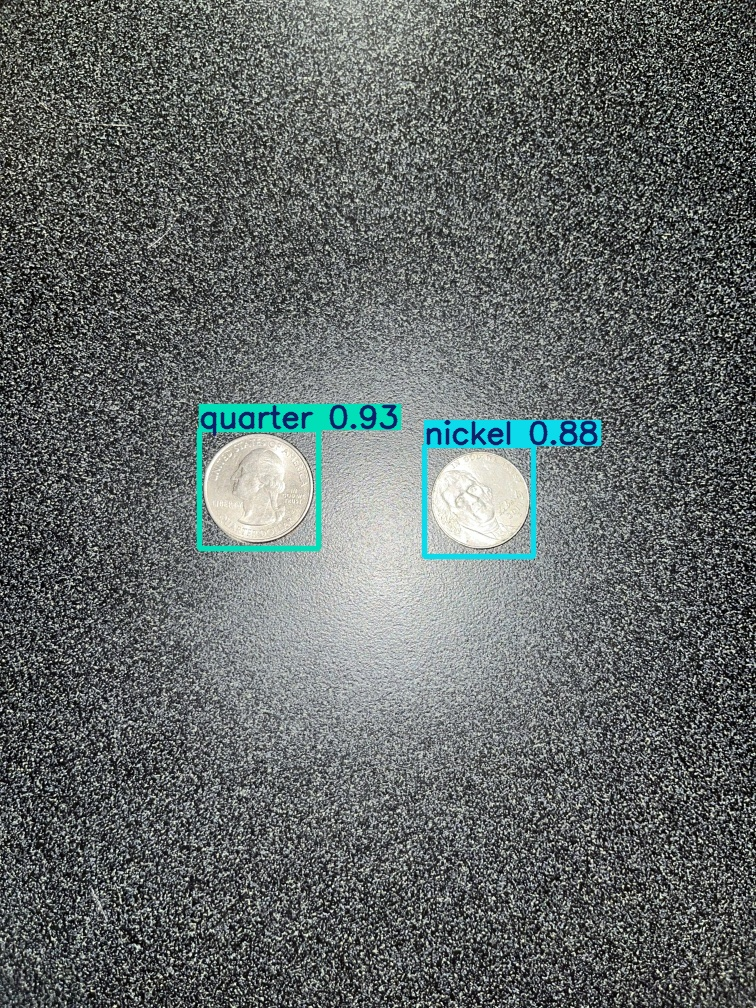

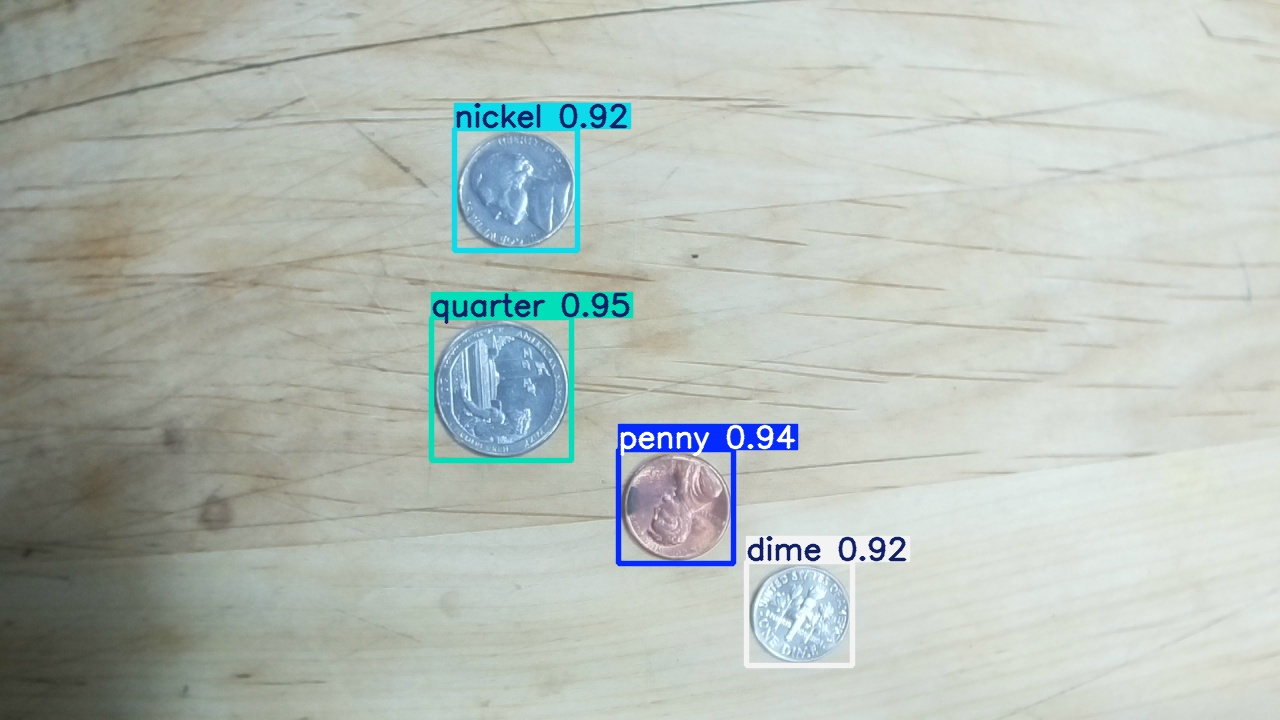

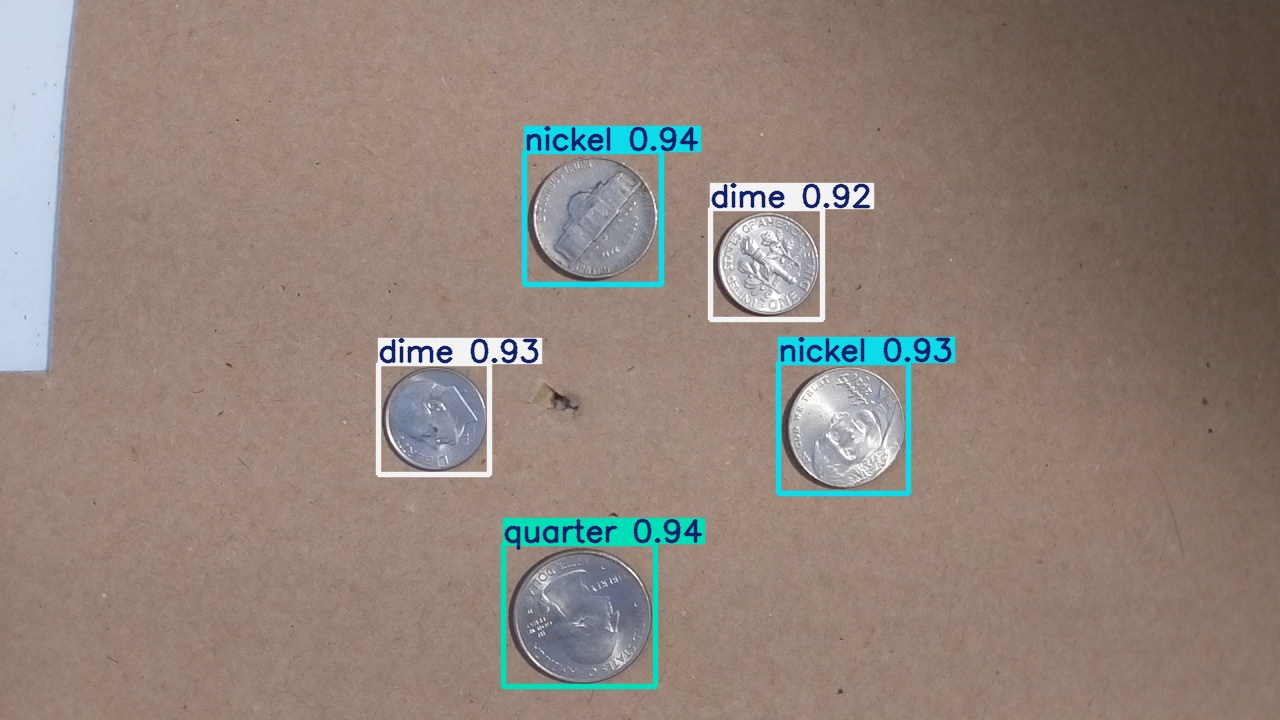

In [5]:
# Display some of the validation results (10 images with label predictions)
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'./runs/detect/predict3/*.jpg')[:5]:
  display(Image(filename=image_path, height=400))
  print('\n')

### Inference
Load the trained YOLOv11 model and run its predictions on a test video `../data/candy_data_06JAN25-test/testvid.mp4`, generating a new output video with predictions of object detections stored in `../results/output_video.mp4`.

In [ ]:
import glob
import time
import cv2
import numpy as np
from ultralytics import YOLO

# Define variables
model_path = './runs/detect/train2/weights/best.pt'
img_source = f'{data_dir}-test/testvid.mp4'
record = True

# Use "400x700" for the CANDY, COIN, and BOTTLE test videos located
# in the data directory
user_res = '400x700'

# Ensure the model path is valid
if (not os.path.exists(model_path)):
    print('ERROR: Model path is invalid or model was not found. Make sure \
        the model filename was entered correctly.')
    sys.exit(0)
else:
    print('Model found')

# Load the model
model = YOLO(model_path, task='detect')
labels = model.names

Model found


In [21]:
# Parse input to see if image source is a file, folder, video, or USB camera
img_ext_list = ['.jpg','.JPG','.jpeg','.JPEG','.png','.PNG','.bmp','.BMP']
vid_ext_list = ['.avi','.mov','.mp4','.mkv','.wmv']
if os.path.isdir(img_source):
    source_type = 'folder'
elif os.path.isfile(img_source):
    _, ext = os.path.splitext(img_source)
    if ext in img_ext_list:
        source_type = 'image'
    elif ext in vid_ext_list:
        source_type = 'video'
    else:
        print(f'File extension {ext} is not supported.')
        sys.exit(0)
elif 'usb' in img_source:
    source_type = 'usb'
    usb_idx = int(img_source[3:])
elif 'picamera' in img_source:
    source_type = 'picamera'
    picam_idx = int(img_source[8:])
else:
    print(f'Input {img_source} is invalid. Please try again.')
    sys.exit(0)
print(source_type)

video


In [22]:
# Parse user-specified display resolution
resize = False
if user_res:
    resize = True
    resW, resH = int(user_res.split('x')[0]), int(user_res.split('x')[1])
print(resW, resH)

400 700


In [23]:
# Check if recording is valid and set up recording
if record:
    if source_type not in ['video','usb']:
        print('Recording only works for video and camera sources. Please \
            try again.')
        sys.exit(0)
    if not user_res:
        print('Please specify resolution to record video at.')
        sys.exit(0)
    
    # Set up recording
    record_name = f'../results/{dataset_type}/demo1.mp4'
    record_fps = 30
    recorder = cv2.VideoWriter(record_name, cv2.VideoWriter_fourcc(*'mp4v'), \
        record_fps, (resW,resH))

In [24]:
# Load or initialize image source
if source_type == 'image':
    imgs_list = [img_source]
elif source_type == 'folder':
    imgs_list = []
    filelist = glob.glob(img_source + '/*')
    for file in filelist:
        _, file_ext = os.path.splitext(file)
        if file_ext in img_ext_list:
            imgs_list.append(file)
elif source_type == 'video' or source_type == 'usb':
    if source_type == 'video': cap_arg = img_source
    elif source_type == 'usb': cap_arg = usb_idx
    cap = cv2.VideoCapture(cap_arg)

    # Set camera or video resolution if specified by user
    if user_res:
        ret = cap.set(3, resW)
        ret = cap.set(4, resH)
elif source_type == 'picamera':
    from picamera2 import Picamera2
    cap = Picamera2()
    cap.configure(cap.create_video_configuration(main={"format": 'RGB888', \
        "size": (resW, resH)}))
    cap.start()

In [25]:
# Set bounding box colors (using the Tableau 10 color scheme)
bbox_colors = [(164,120,87), (68,148,228), (93,97,209), (178,182,133), (88,159,106), 
              (96,202,231), (159,124,168), (169,162,241), (98,118,150), (172,176,184)]

# Initialize control and status variables
avg_frame_rate = 0
frame_rate_buffer = []
fps_avg_len = 200
img_count = 0

# Define the video codec and create a VideoWriter object
output_path = f'../results/{dataset_type}/output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Choose codec (e.g., XVID, MJPG)
fps = 20  # Set frames per second (adjust to your needs)

# Create VideoWriter object
recorder = cv2.VideoWriter(output_path, fourcc, fps, (resW, resH))

# Begin inference loop
while True:
    # Load frame from image source
    t_start = time.perf_counter()
    if source_type == 'image' or source_type == 'folder':
        # If source is image or image folder, load image using its filename
        if img_count >= len(imgs_list):
            print('All images have been processed. Exiting program.')
            sys.exit(0)
        img_filename = imgs_list[img_count]
        frame = cv2.imread(img_filename)
        img_count = img_count + 1
    # If source is a video, load next frame from video file
    elif source_type == 'video':
        ret, frame = cap.read()
        if not ret:
            print('Reached end of the video file. Exiting program.')
            break
    # If source is a USB camera, grab frame from camera
    elif source_type == 'usb': 
        ret, frame = cap.read()
        if (frame is None) or (not ret):
            print('Unable to read frames from the camera. This indicates the \
                camera is disconnected or not working. Exiting program.')
            break
    # If source is a Picamera, grab frames using picamera interface
    elif source_type == 'picamera': 
        frame = cap.capture_array()
        if (frame is None):
            print('Unable to read frames from the Picamera. This indicates \
                the camera is disconnected or not working. Exiting program.')
            break

    # Resize frame to desired display resolution
    if resize == True:
        frame = cv2.resize(frame, (resW, resH))

    # Run inference on frame and extract results
    results = model(frame, verbose=False)
    detections = results[0].boxes

    # Go through each detection and get bbox coords, confidence, and class,
    # and count the number of objects detected
    object_count = 0
    for i in range(len(detections)):
        # Get bounding box coordinates. Ultralytics returns results in
        # Tensor format, which have to be converted to a regular Python array.
        xyxy_tensor = detections[i].xyxy.cpu() # Tensor format in CPU memory
        xyxy = xyxy_tensor.numpy().squeeze() # Convert to Numpy array
        xmin, ymin, xmax, ymax = xyxy.astype(int) # Extract int coords

        # Get bounding box class ID, name, and confidence
        classidx = int(detections[i].cls.item())
        classname = labels[classidx]
        conf = detections[i].conf.item()

        # Draw box if confidence threshold is high enough
        if conf > 0.5:
            color = bbox_colors[classidx % 10]
            cv2.rectangle(frame, (xmin,ymin), (xmax,ymax), color, 2)

            # Draw label with class name and confidence
            label = f'{classname}: {int(conf*100)}%'
            labelSize, baseLine = cv2.getTextSize(label, \
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1) # Get font size
            label_ymin = max(ymin, labelSize[1] + 10)
            
            # Draw label background
            cv2.rectangle(frame, (xmin, label_ymin-labelSize[1]-10), \
                (xmin+labelSize[0], label_ymin+baseLine-10), color, \
                    cv2.FILLED) # Draw white box to put label text in
            cv2.putText(frame, label, (xmin, label_ymin-7), \
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1) # Draw label text

            # Basic example: count the number of objects in the image
            object_count = object_count + 1

    # Calculate and draw framerate (if using video, USB, or Picamera source)
    if source_type == 'video' or source_type == 'usb' or source_type == 'picamera':
        cv2.putText(frame, f'FPS: {avg_frame_rate:0.2f}', (10,20), \
            cv2.FONT_HERSHEY_SIMPLEX, .7, (0,255,255), 2) # Draw framerate
    
    # Display detection results
    # cv2.putText(frame, f'Number of objects: {object_count}', (10,40), \
    #     cv2.FONT_HERSHEY_SIMPLEX, .7, (0,255,255), 2) # Draw number of objects
    # cv2.imshow('YOLO detection results', frame) # Display image
    if record:
        recorder.write(frame)

    # If inferencing on individual images, wait for user keypress before
    # moving to next image. Otherwise, wait 5ms before moving to next frame.
    if source_type == 'image' or source_type == 'folder':
        key = cv2.waitKey()
    elif source_type == 'video' or source_type == 'usb' or source_type == 'picamera':
        key = ""
        # key = cv2.waitKey(5)
    
    # Press 'q' to quit
    if key == ord('q') or key == ord('Q'):
        break
    # Press 's' to pause inference
    elif key == ord('s') or key == ord('S'):
        cv2.waitKey()
    # Press 'p' to save a picture of results on this frame
    elif key == ord('p') or key == ord('P'):
        cv2.imwrite('capture.png',frame)
    
    # Calculate FPS for this frame
    t_stop = time.perf_counter()
    frame_rate_calc = float(1/(t_stop - t_start))

    # Append FPS result to frame_rate_buffer (for finding average FPS
    # over multiple frames)
    if len(frame_rate_buffer) >= fps_avg_len:
        temp = frame_rate_buffer.pop(0)
        frame_rate_buffer.append(frame_rate_calc)
    else:
        frame_rate_buffer.append(frame_rate_calc)

    # Calculate average FPS for past frames
    avg_frame_rate = np.mean(frame_rate_buffer)
    if record:
        recorder.write(frame)

recorder.release()

Reached end of the video file. Exiting program.


In [26]:
# Clean up
print(f'Average pipeline FPS: {avg_frame_rate:.2f}')
if source_type == 'video' or source_type == 'usb':
    cap.release()
elif source_type == 'picamera':
    cap.stop()
if record:
    recorder.release()
# cv2.destroyAllWindows()

Average pipeline FPS: 244.40
